In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
import numpy as np

In [2]:
col_names = ['crime_rate', 'zoned_land', 'non_retail_business', 'charles_river', 'NO_conc', 'num_rooms', 
            'age', 'dist', 'highways', 'tax_rate', 'pupil_teacher_ratio', 'blacks', 'lower_status', 'median_value']
housing_data_df = pd.read_csv('housing_data.csv', header = None, names = col_names)
housing_data_df.head(2)

,crime_rate,zoned_land,non_retail_business,charles_river,NO_conc,num_rooms,age,dist,highways,tax_rate,pupil_teacher_ratio,blacks,lower_status,median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


For CV 1
                            OLS Regression Results                            
Dep. Variable:           median_value   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     95.96
Date:                Thu, 07 Mar 2019   Prob (F-statistic):          1.52e-119
Time:                        22:51:49   Log-Likelihood:                -1362.5
No. Observations:                 455   AIC:                             2753.
Df Residuals:                     441   BIC:                             2811.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  38

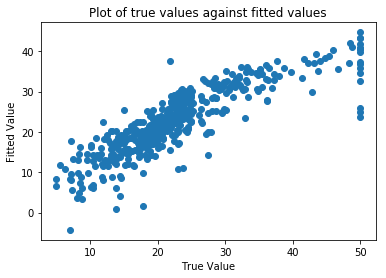

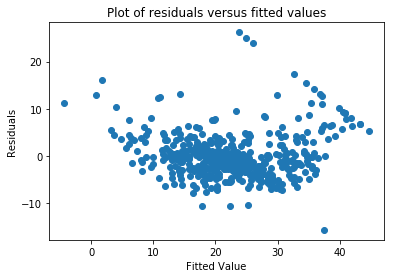

The rmse for the entire dataset is 4.679191295697282


In [31]:
lr_rmse_train = []
lr_rmse_test = []
lr_rmse = 0.0
kf = KFold(n_splits = 10)
i = 1
for train_ind, test_ind in kf.split(housing_data_df):
    X_train = housing_data_df.loc[train_ind, 'crime_rate' : 'lower_status']
    X_test = housing_data_df.loc[test_ind, 'crime_rate' : 'lower_status']
    y_train = housing_data_df.loc[train_ind, 'median_value']
    y_test = housing_data_df.loc[test_ind, 'median_value']
    
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test, has_constant='add')
    
    model = sm.OLS(y_train, X_train_const).fit()
    predictions = model.predict(X_test_const)

    lr_rmse_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train_const))))
    lr_rmse_test.append(sqrt(mean_squared_error(y_test, predictions)))
    
    print("For CV " + str(i))
    print_model = model.summary()
    print(print_model)
    '''
    
    plt.figure()
    
    X_new = sm.add_constant(housing_data_df.loc[:, 'crime_rate' : 'lower_status'])
    
    plt.scatter(housing_data_df.loc[:, 'median_value'], 
                model.predict(X_new))
    plt.xlabel('True Value')
    plt.ylabel('Fitted Value')
    plt.title('Plot of true values against fitted values of the median value for fold ' + str(i))
    plt.show()
    residuals = housing_data_df.loc[:, 'median_value'] - model.predict(X_new)
    
    plt.figure()
    plt.scatter(residuals, 
                model.predict(X_new))
    plt.xlabel('Fitted Value')
    plt.ylabel('Residuals')
    plt.title('Plot of residuals versus fitted values of the median value for fold ' + str(i))
    plt.show()
    i += 1
    '''
print("The average train rmse is " + str(sum(lr_rmse_train) / len(lr_rmse_train)))
print("The average test rmse is " + str(sum(lr_rmse_test) / len(lr_rmse_test)))
model = sm.OLS(housing_data_df.loc[:, 'median_value'], sm.add_constant(housing_data_df.loc[:, 'crime_rate' : 'lower_status'])).fit()
predictions = model.predict(sm.add_constant(housing_data_df.loc[:, 'crime_rate' : 'lower_status']))
print(model.summary())
#reg_clf = LinearRegression()
#reg_clf.fit(housing_data_df.loc[:, 'crime_rate' : 'lower_status'], housing_data_df.loc[:, 'median_value'])
#y_pred = reg_clf.predict(housing_data_df.loc[:, 'crime_rate' : 'lower_status'])
lr_rmse = mean_squared_error(housing_data_df.loc[:, 'median_value'], predictions)
plt.figure()

X_new = sm.add_constant(housing_data_df.loc[:, 'crime_rate' : 'lower_status'])

plt.scatter(housing_data_df.loc[:, 'median_value'], 
            model.predict(X_new))
plt.xlabel('True Value')
plt.ylabel('Fitted Value')
plt.title('Plot of true values against fitted values')
plt.show()
residuals = housing_data_df.loc[:, 'median_value'] - model.predict(X_new)

plt.figure()
plt.scatter(model.predict(X_new), residuals)
plt.xlabel('Fitted Value')
plt.ylabel('Residuals')
plt.title('Plot of residuals versus fitted values')
plt.show()
print("The rmse for the entire dataset is " + str(sqrt(lr_rmse)))

In [17]:
#Ridge final
scorer = make_scorer(mean_squared_error, greater_is_better= False)
alpha_ridge = [10 ** i for i in range(-10, 10)]
clf = RidgeCV(alphas  = alpha_ridge, cv=10, scoring = scorer)
clf.fit(housing_data_df.loc[:, 'crime_rate' : 'lower_status'], housing_data_df.loc[:, 'median_value'])
print(clf.alpha_ )

100.0


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [18]:
alpha_ridge

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

In [26]:
#Ridge final
scorer = make_scorer(mean_squared_error, greater_is_better= False)
alpha_ridge = [i for i in range(10, 1000, 10)]
clf = RidgeCV(alphas  = alpha_ridge, cv=10, scoring = scorer)
clf.fit(housing_data_df.loc[:, 'crime_rate' : 'lower_status'], housing_data_df.loc[:, 'median_value'])
print(clf.alpha_ )
ridge_best_alpha = clf.alpha_
print("The coefficients are")
print(clf.coef_)
print(clf.intercept_)

160
The coefficients are
[-0.10145957  0.05533119 -0.05261697  0.44956815 -0.16019245  1.88352037
  0.00646199 -1.09431728  0.32449188 -0.01626689 -0.83176423  0.00909715
 -0.69208415]
39.19199259850998


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [149]:
#Ridge final
ridge_rmse_train = []
ridge_rmse_test = []
ridge_rmse = 0.0
kf = KFold(n_splits = 10)
i = 1
for train_ind, test_ind in kf.split(housing_data_df):
    X_train = housing_data_df.loc[train_ind, 'crime_rate' : 'lower_status']
    X_test = housing_data_df.loc[test_ind, 'crime_rate' : 'lower_status']
    y_train = housing_data_df.loc[train_ind, 'median_value']
    y_test = housing_data_df.loc[test_ind, 'median_value']
    ridge_clf = Ridge(alpha = ridge_best_alpha)
    ridge_clf.fit(X_train, y_train)
    y_pred = ridge_clf.predict(X_test)
    ridge_rmse_test.append(sqrt(mean_squared_error(y_test, y_pred)))
    ridge_rmse_train.append(sqrt(mean_squared_error(y_train, ridge_clf.predict(X_train))))
    print("For CV " + str(i))
    i += 1
ridge_clf.fit(housing_data_df.loc[:, 'crime_rate' : 'lower_status'], housing_data_df.loc[:, 'median_value'])
y_pred = ridge_clf.predict(housing_data_df.loc[:, 'crime_rate' : 'lower_status'])
ridge_rmse = sqrt(mean_squared_error(housing_data_df.loc[:, 'median_value'], y_pred))
print("The average train rmse is " + str(sum(ridge_rmse_train) / len(ridge_rmse_train)))
print("The average test rmse is " + str(sum(ridge_rmse_test) / len(ridge_rmse_test)))
print("The rmse for the entire dataset is " + str(ridge_rmse))

For CV 1
For CV 2
For CV 3
For CV 4
For CV 5
For CV 6
For CV 7
For CV 8
For CV 9
For CV 10
The average train rmse is 4.915979029724605
The average test rmse is 5.070354775359894
The rmse for the entire dataset is 4.937207566949637


In [152]:
#Lasso final
scorer = make_scorer(mean_squared_error, greater_is_better= False)
alpha_lasso = [10 ** i for i in range(-10, 10)]
clf = LassoCV(alphas  = alpha_lasso, cv=10)
clf.fit(housing_data_df.loc[:, 'crime_rate' : 'lower_status'], housing_data_df.loc[:, 'median_value'])
print(clf.alpha_ )

0.1


In [29]:
#Lasso final
scorer = make_scorer(mean_squared_error, greater_is_better= False)
alpha_lasso = np.linspace(0.01, 1, 100)
clf = LassoCV(alphas  = alpha_lasso, cv=10)
clf.fit(housing_data_df.loc[:, 'crime_rate' : 'lower_status'], housing_data_df.loc[:, 'median_value'])
print(clf.alpha_ )
lasso_best_alpha = clf.alpha_
print("The coefficients are")
print(clf.coef_)
print(clf.intercept_)

0.55
The coefficients are
[-8.12226204e-02  4.95723060e-02 -2.32242891e-03  0.00000000e+00
 -0.00000000e+00  2.34539743e+00  5.29087694e-03 -9.07370227e-01
  2.76774355e-01 -1.54904156e-02 -7.55348754e-01  9.35185346e-03
 -6.66961166e-01]
33.35420595075239


In [154]:
#Lasso final
lasso_rmse_train = []
lasso_rmse_test = []
lasso_rmse = 0.0
kf = KFold(n_splits = 10)
i = 1
for train_ind, test_ind in kf.split(housing_data_df):
    X_train = housing_data_df.loc[train_ind, 'crime_rate' : 'lower_status']
    X_test = housing_data_df.loc[test_ind, 'crime_rate' : 'lower_status']
    y_train = housing_data_df.loc[train_ind, 'median_value']
    y_test = housing_data_df.loc[test_ind, 'median_value']
    lasso_clf = Lasso(alpha = lasso_best_alpha)
    lasso_clf.fit(X_train, y_train)
    y_pred = ridge_clf.predict(X_test)
    lasso_rmse_test.append(sqrt(mean_squared_error(y_test, y_pred)))
    lasso_rmse_train.append(sqrt(mean_squared_error(y_train, lasso_clf.predict(X_train))))
    
    print("For CV " + str(i))
    i += 1
    
lasso_clf.fit(housing_data_df.loc[:, 'crime_rate' : 'lower_status'], housing_data_df.loc[:, 'median_value'])
y_pred = lasso_clf.predict(housing_data_df.loc[:, 'crime_rate' : 'lower_status'])
lasso_rmse = sqrt(mean_squared_error(housing_data_df.loc[:, 'median_value'], y_pred))
print("The average train rmse is " + str(sum(lasso_rmse_train) / len(lasso_rmse_train)))
print("The average test rmse is " + str(sum(lasso_rmse_test) / len(lasso_rmse_test)))
print("The rmse for the entire dataset is " + str(lasso_rmse))

For CV 1
For CV 2
For CV 3
For CV 4
For CV 5
For CV 6
For CV 7
For CV 8
For CV 9
For CV 10
The average train rmse is 4.873405113082294
The average test rmse is 4.64449133617677
The rmse for the entire dataset is 4.932580597474054


In [24]:
#Elastic net final
scorer = make_scorer(mean_squared_error, greater_is_better= False)
alpha_en = [10 ** i for i in range(-10, 10)]
l1_ratio_en = np.linspace(0.1, 0.9, 9)
clf = ElasticNetCV(l1_ratio  = l1_ratio_en, alphas = alpha_en, cv=10, n_jobs = -1, verbose = 1)
clf.fit(housing_data_df.loc[:, 'crime_rate' : 'lower_status'], housing_data_df.loc[:, 'median_value'])
print(clf.alpha_ )
print(clf.l1_ratio_)
print("l1 **** ")
print(clf.alpha_ * clf.l1_ratio_)
print("l2 **** ")
print(0.5 * clf.alpha_ * (1 - clf.l1_ratio_))
en_best_alpha = clf.alpha_
en_best_l1_ratio = clf.l1_ratio_
print("The coefficients are")
print(clf.coef_)
print(clf.intercept_)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  42 tasks      

1.0
0.1
l1 **** 
0.1
l2 **** 
0.45
The coefficients are
[-0.09307442  0.05483402 -0.03742676  0.09261301 -0.          0.93046614
  0.02154238 -0.81552912  0.32412172 -0.01677056 -0.76464731  0.00835567
 -0.75428615]
42.85343709253547


In [156]:
#Elastic net final
en_rmse_train = []
en_rmse_test = []
en_rmse = 0.0
kf = KFold(n_splits = 10)
i = 1
for train_ind, test_ind in kf.split(housing_data_df):
    X_train = housing_data_df.loc[train_ind, 'crime_rate' : 'lower_status']
    X_test = housing_data_df.loc[test_ind, 'crime_rate' : 'lower_status']
    y_train = housing_data_df.loc[train_ind, 'median_value']
    y_test = housing_data_df.loc[test_ind, 'median_value']
    en_clf = ElasticNet(alpha = en_best_alpha, l1_ratio = en_best_l1_ratio)
    en_clf.fit(X_train, y_train)
    y_pred = ridge_clf.predict(X_test)
    en_rmse_test.append(sqrt(mean_squared_error(y_test, y_pred)))
    en_rmse_train.append(sqrt(mean_squared_error(y_train, en_clf.predict(X_train))))
    
    print("For CV " + str(i))
    i += 1
    
en_clf.fit(housing_data_df.loc[:, 'crime_rate' : 'lower_status'], housing_data_df.loc[:, 'median_value'])
y_pred = en_clf.predict(housing_data_df.loc[:, 'crime_rate' : 'lower_status'])
en_rmse = sqrt(mean_squared_error(housing_data_df.loc[:, 'median_value'], y_pred))
print("The average train rmse is " + str(sum(en_rmse_train) / len(en_rmse_train)))
print("The average test rmse is " + str(sum(en_rmse_test) / len(en_rmse_test)))
print("The rmse for the entire dataset is " + str(en_rmse))

For CV 1
For CV 2
For CV 3
For CV 4
For CV 5
For CV 6
For CV 7
For CV 8
For CV 9
For CV 10
The average train rmse is 5.10493540671659
The average test rmse is 4.64449133617677
The rmse for the entire dataset is 5.129131164905265
